In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path+"/scripts")
    sys.path.append(module_path+"/classes")


In [24]:
import pandas as pd
import pickle

with open("../data/tech_review_corpus.pkl","rb") as f:
    tech_review_corpus = pickle.load(f)
    
display(pd.DataFrame(tech_review_corpus).head(10))

reviews = pd.DataFrame(tech_review_corpus).review.tolist()

reviews = list(map(str.split, reviews))

,index,review
0,299,fluor great company people care make differenc...
1,1145,fluor first powerhouse epc went heavy workshar...
2,1375,much could add enjoyed working fluor people wo...
3,1874,place pretty boring time interesting facility ...
4,2136,everyone hurry get thing done hurry part make ...
5,2209,hire first term would rate hired nice intellig...
6,2685,hated working company pay great management utt...
7,3054,interesting day work enjoyable environment use...
8,3082,challenging place work manager five office 200...
9,3134,total thirty seven 37 year successful engineer...


In [3]:
#Plaid ML Back-End
import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

## Setup Vocabulary

In [34]:
from collections import Counter

vocab = {}

with open("../data/glove-tech-revew-vocab.txt") as f:
    for l in f:
        l_split = l.rstrip('\n').split(",")
        vocab[l_split[0]] = l_split[1]
    
# for review in tech_review_corpus:
#     sent = review["review"]
#     for word in sent:
#         vocab[word]+=1
        
# vocab_size = 15000

vocab = Counter(vocab)
        
print("Vocab Size", len(vocab))
popular = dict(vocab) # vocab.most_common(vocab_size))


Vocab Size 17972


'11881'

In [35]:
word_map = dict(enumerate(popular.keys(),3))

word_map[0]='<pad>'
word_map[1]='<start>'
word_map[2]='<unk>'

vocab_size = len(word_map)
print("FInal Vocab Size",vocab_size)

reverse_word_map = dict([(value, key) for (key, value) in word_map.items()])

print(reverse_word_map["<unk>"])

FInal Vocab Size 17975
2


In [36]:
X_data = []
for sent in reviews:
    tmp = [reverse_word_map[i] if i in reverse_word_map.keys() else 2 for i in sent]
    X_data.append(tmp)

print("Sample Review")
print(reviews[0])

print("\n")
print("Map to index row")
print(X_data[0])

print("\n")
print("Validate index to word")
print( [word_map[i] for i in X_data[0] ] )

Sample Review
['fluor', 'great', 'company', 'people', 'care', 'make', 'difference', 'management', 'care', 'employee', 'well', 'providing', 'continued', 'learning', 'opportunity']


Map to index row
[3, 4, 5, 6, 7, 8, 9, 10, 7, 11, 12, 13, 14, 15, 16]


Validate index to word
['fluor', 'great', 'company', 'people', 'care', 'make', 'difference', 'management', 'care', 'employee', 'well', 'providing', 'continued', 'learning', 'opportunity']


In [37]:
for i, w in enumerate(X_data):
    if 2 in w:
        print(i)
        break
        
print("Sample Review")
print(reviews[i])

print("\n")
print("Map to index row")
print(X_data[i])

print("\n")
print("Validate index to word")
print( [word_map[w] for w in X_data[i] ] )

1
Sample Review
['fluor', 'first', 'powerhouse', 'epc', 'went', 'heavy', 'worksharing', 'send', 'much', 'work', 'overseas', 'possible', 'keep', 'core', 'person', 'heavy', 'loaded', 'company', 'management', 'fluor', 'chase', 'big', 'project', 'hire', 'thousand', 'oil', 'booming', 'turn', 'lay', 'thousand', 'going', 'fluor', 'sharpest', 'spike', 'hiring', 'laying', 'employee', 'clearly', 'greatest', 'asset']


Map to index row
[3, 17, 18, 19, 20, 21, 2, 22, 23, 24, 25, 26, 27, 28, 29, 21, 30, 5, 10, 3, 31, 32, 33, 34, 35, 36, 37, 38, 39, 35, 40, 3, 41, 42, 43, 44, 11, 45, 46, 47]


Validate index to word
['fluor', 'first', 'powerhouse', 'epc', 'went', 'heavy', '<unk>', 'send', 'much', 'work', 'overseas', 'possible', 'keep', 'core', 'person', 'heavy', 'loaded', 'company', 'management', 'fluor', 'chase', 'big', 'project', 'hire', 'thousand', 'oil', 'booming', 'turn', 'lay', 'thousand', 'going', 'fluor', 'sharpest', 'spike', 'hiring', 'laying', 'employee', 'clearly', 'greatest', 'asset']


Max Character length 1330
Average Character Length 161.93010099224327
Standard Deviation 127.18595162381853
Median Character Length 126.0
Characters 2 standard deviations from mean 416.3020042398803


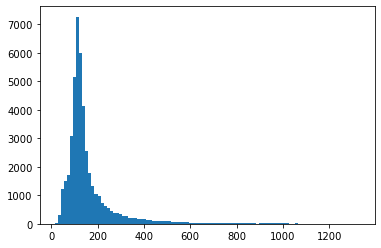

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
word_length = pd.DataFrame(tech_review_corpus).review.apply(len).tolist()

print("Max Character length", max(word_length))
print("Average Character Length", np.mean(word_length))
print("Standard Deviation", np.std(word_length))
print("Median Character Length", np.median(word_length))
print("Characters 2 standard deviations from mean", np.mean(word_length) + (2*np.std(word_length)))

plt.hist(word_length,bins=100)
plt.show()

In [39]:
from keras.preprocessing import sequence

overall_maxlen = 600

train_x = sequence.pad_sequences(X_data, maxlen=overall_maxlen)

print("Validate index to word")
print( [word_map[i] for i in train_x[2] ] )

Using TensorFlow backend.


Validate index to word
['<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pa

Attention-Based-Aspect-Detection Code

In [10]:
# import importlib
# import ABAE.optimizers
# importlib.reload(ABAE.optimizers)

<module 'ABAE.optimizers' from '/Users/christopherballenger/Code/smu-ds-opinion-mining-co-reviews/classes/ABAE/optimizers.py'>

In [158]:
import ABAE.utils as U
parser = U.add_common_args()

#Paramaters
algorithm = "adam"
neg_size = 20
emb_dim = 300
aspect_size = 8
ortho_reg_default = 0.1
batch_size = 32
epochs = 15

In [41]:
import keras.optimizers as opt

def sentence_batch_generator(data, batch_size):
    n_batch = len(data) // batch_size
    batch_count = 0
    np.random.shuffle(data)

    while True:
        if batch_count == n_batch:
            np.random.shuffle(data)
            batch_count = 0

        batch = data[batch_count * batch_size: (batch_count + 1) * batch_size]
        batch_count += 1
        yield batch


def negative_batch_generator(data, batch_size, neg_size):
    data_len = data.shape[0]
    dim = data.shape[1]

    while True:
        indices = np.random.choice(data_len, batch_size * neg_size)
        samples = data[indices].reshape(batch_size, neg_size, dim)
        yield samples

def get_optimizer(algo = "adam"):
    clipvalue = 0
    clipnorm = 10

    if algo == 'rmsprop':
        return opt.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06, clipnorm=clipnorm, clipvalue=clipvalue)
    elif algo == 'sgd':
        return opt.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False, clipnorm=clipnorm, clipvalue=clipvalue)
    elif algo == 'adagrad':
        return opt.Adagrad(lr=0.01, epsilon=1e-06, clipnorm=clipnorm, clipvalue=clipvalue)
    elif algo == 'adadelta':
        return opt.Adadelta(lr=1.0, rho=0.95, epsilon=1e-06, clipnorm=clipnorm, clipvalue=clipvalue)
    elif algo == 'adam':
        return opt.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipnorm=clipnorm, clipvalue=clipvalue)
    elif algo == 'adamax':
        return opt.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipnorm=clipnorm, clipvalue=clipvalue)

optimizer = get_optimizer(algorithm)
print(optimizer)

In [ ]:
# import importlib
# import ABAE.w2vEmbReader
# importlib.reload(ABAE.w2vEmbReader)

Create Word Embedding and Aspect Embeddings

In [20]:
# import spacy

# nlp = spacy.load("en_core_web_lg")

In [155]:
# %%time

# embedding_matrix = np.zeros((vocab_size, 300))
# index=0
# counter = 0
# for word in reverse_word_map.keys():
#     index = reverse_word_map[word]
#     if index > vocab_size - 1:
#         pass
#     else:
#         embedding_vector = nlp(word).vector
#         if sum(embedding_vector) != 0:
#             embedding_matrix[index] = embedding_vector
#         else:
#             counter += 1
#             embedding_matrix[index] = np.ones(300)
            
# embedding_matrix[2] = nlp('unk').vector
# embedding_matrix[1] = np.ones(300)

# emb_matrix = embedding_matrix / np.linalg.norm(embedding_matrix, axis=-1, keepdims=True)

CPU times: user 39.6 s, sys: 83.1 ms, total: 39.6 s
Wall time: 39.7 s


In [162]:
import importlib
import ABAE.w2vEmbReader
importlib.reload(ABAE.w2vEmbReader)

<module 'ABAE.w2vEmbReader' from '/Users/christopherballenger/Code/smu-ds-opinion-mining-co-reviews/classes/ABAE/w2vEmbReader.py'>

In [163]:
%%time

from ABAE.w2vEmbReader import W2VEmbReader as EmbReader

emb_filename = '../models/glove.6B.300d.txt.word2vec'
emb_reader = EmbReader(emb_filename)

CPU times: user 1min 28s, sys: 1.04 s, total: 1min 29s
Wall time: 1min 30s


In [164]:
aspect_matrix = emb_reader.get_aspect_matrix(reverse_word_map, aspect_size)
aspect_size = emb_reader.aspect_size
emb_dim = emb_reader.emb_dim

In [167]:
import logging
import os
import keras.backend as K
from keras.layers import Dense, Activation, Embedding, Input
from keras.models import Model
from keras.constraints import MaxNorm

from ABAE.my_layers import Attention, Average, WeightedSum, WeightedAspectEmb, MaxMargin

def ortho_reg(weight_matrix):
    ### orthogonal regularization for aspect embedding matrix ###
    w_n = K.l2_normalize(weight_matrix, axis=-1)
    reg = K.sum(K.square(K.dot(w_n, K.transpose(w_n)) - K.eye(w_n.shape[0])))
    return ortho_reg_default * reg

# ##### Inputs #####
sentence_input = Input(shape=(overall_maxlen,), dtype='int32', name='sentence_input')
neg_input = Input(shape=(neg_size, overall_maxlen), dtype='int32', name='neg_input')

# ##### Construct word embedding layer #####
word_emb = Embedding(vocab_size, emb_dim,
                     mask_zero=True, name='word_emb',
                     embeddings_constraint=MaxNorm(10))

##### Compute sentence representation #####
e_w = word_emb(sentence_input)
y_s = Average()(e_w)
att_weights = Attention(name='att_weights',
                        W_constraint=MaxNorm(10),
                        b_constraint=MaxNorm(10))([e_w, y_s])
z_s = WeightedSum()([e_w, att_weights])

##### Compute representations of negative instances #####
e_neg = word_emb(neg_input)
z_n = Average()(e_neg)

##### Reconstruction #####
p_t = Dense(aspect_size)(z_s)
p_t = Activation('softmax', name='p_t')(p_t)
r_s = WeightedAspectEmb(aspect_size, emb_dim, name='aspect_emb',
                        W_constraint=MaxNorm(10),
                        W_regularizer=ortho_reg)(p_t)

##### Loss #####
loss = MaxMargin(name='max_margin')([z_s, z_n, r_s])
model = Model(inputs=[sentence_input, neg_input], outputs=[loss])


In [168]:
### Word embedding and aspect embedding initialization ######
print('Initializing word embedding matrix')
embs = model.get_layer('word_emb').embeddings
K.set_value(embs, emb_reader.get_emb_matrix_given_vocab(reverse_word_map, K.get_value(embs)))
print('Initializing aspect embedding matrix as centroid of kmean clusters')
K.set_value(model.get_layer('aspect_emb').W, aspect_matrix)

# freeze the word embedding layer
model.get_layer('word_emb').trainable = False
model.compile(optimizer=optimizer, loss=U.max_margin_loss, metrics=[U.max_margin_loss])


print(model.summary())

Initializing word embedding matrix
Initializing aspect embedding matrix as centroid of kmean clusters
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sentence_input (InputLayer)     (None, 600)          0                                            
__________________________________________________________________________________________________
word_emb (Embedding)            multiple             5392500     sentence_input[0][0]             
                                                                 neg_input[0][0]                  
__________________________________________________________________________________________________
average_5 (Average)             (None, 300)          0           word_emb[0][0]                   
_________________________________________________________________________________________

In [169]:
import logging
import numpy as np
from time import time

logging.basicConfig(
    # filename='out.log',
    level=logging.INFO,
    format='%(asctime)s %(levelname)s %(message)s')
logger = logging.getLogger(__name__)

from tqdm import tqdm

logger.info("-"*80)

vocab_inv = {}
for w, ind in reverse_word_map.items():
    vocab_inv[ind] = w

In [170]:
sen_gen = sentence_batch_generator(train_x, batch_size)
neg_gen = negative_batch_generator(train_x, batch_size, neg_size)
batches_per_epoch = len(train_x) // batch_size

In [171]:
batches_per_epoch

1414

In [172]:
min_loss = float('inf')
for ii in range(epochs):
    t0 = time()
    loss, max_margin_loss = 0., 0.

    for b in tqdm(range(batches_per_epoch)):
        sen_input = next(sen_gen)
        neg_input = next(neg_gen)

        batch_loss, batch_max_margin_loss = model.train_on_batch([sen_input, neg_input],
                                                                 np.ones((batch_size, 1)))
        loss += batch_loss / batches_per_epoch
        max_margin_loss += batch_max_margin_loss / batches_per_epoch

    tr_time = time() - t0

    if loss < min_loss:
        min_loss = loss
        word_emb = K.get_value(model.get_layer('word_emb').embeddings)
        aspect_emb = K.get_value(model.get_layer('aspect_emb').W)
        word_emb = word_emb / np.linalg.norm(word_emb, axis=-1, keepdims=True)
        aspect_emb = aspect_emb / np.linalg.norm(aspect_emb, axis=-1, keepdims=True)
        aspect_file = open("../results/aspect.log", 'wt', encoding='utf-8')
        model.save('../results/model_param')

        for ind in range(len(aspect_emb)):
            desc = aspect_emb[ind]
            sims = word_emb.dot(desc.T)
            ordered_words = np.argsort(sims)[::-1]
            desc_list = [vocab_inv[w] + "|" + str(sims[w]) for w in ordered_words[:100]]
            print('Aspect %d:' % ind)
            print(desc_list)
            aspect_file.write('Aspect %d:\n' % ind)
            aspect_file.write(' '.join(desc_list) + '\n\n')

    print('Epoch %d, train: %is' % (ii, tr_time))
    print('Total loss: %.4f, max_margin_loss: %.4f, ortho_reg: %.4f' % (loss, max_margin_loss, loss - max_margin_loss))
    

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['pay|0.60486305', 'salary|0.5883047', 'payment|0.5450996', 'pension|0.53840154', 'compensation|0.5285443', 'hefty|0.52126217', 'paying|0.51711434', 'paid|0.5095097', 'severance|0.4963385', 'revenue|0.4843022', 'wage|0.47652394', 'cost|0.47535545', 'premium|0.47493047', 'payouts|0.46842998', 'payout|0.46755844', 'payroll|0.4661554', 'increase|0.4646935', 'company|0.4617604', 'income|0.46083635', 'dividend|0.4580262', 'minimum|0.45432532', 'tax|0.45245275', 'amount|0.44630796', 'employee|0.44499236', 'fee|0.44479144', 'subsidy|0.4436579', 'price|0.44211292', 'employer|0.4384857', 'reduced|0.43383974', 'cash|0.4333901', 'earnings|0.43233043', 'monthly|0.43028396', 'discount|0.4287756', 'liability|0.42627552', 'insurance|0.42288762', 'hourly|0.4222272', 'purchase|0.41984802', 'cut|0.41932982', 'dlrs|0.4191119', 'refund|0.41827404', 'debt|0.41002828', 'transaction|0.40828913', 'offset|0.40718353', 'payable|0.40332335', 'exceed|0.4027853', 'surcharge|0.39970887', 'owed|0.39965302'

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['pay|0.5736295', 'salary|0.5585704', 'payment|0.50846857', 'pension|0.50560987', 'paying|0.49942595', 'paid|0.49556977', 'compensation|0.49512607', 'severance|0.4786046', 'hefty|0.47692758', 'payroll|0.46781033', 'revenue|0.45360205', 'dividend|0.44784328', 'payout|0.44230914', 'employer|0.44080874', 'employee|0.43905276', 'fee|0.43726715', 'company|0.43643355', 'premium|0.43603313', 'payouts|0.43053463', 'cost|0.42961246', 'tax|0.42787993', 'income|0.42677745', 'minimum|0.42607588', 'wage|0.42303962', 'liability|0.41256797', 'amount|0.41103926', 'transaction|0.41047227', 'refund|0.40669185', 'increase|0.40585536', 'earnings|0.4021569', 'subsidy|0.40191597', 'discount|0.4009765', 'cash|0.396778', 'price|0.39673454', 'owed|0.39600503', 'hourly|0.39505327', 'reduced|0.3936209', 'payable|0.39249063', 'cut|0.3903368', 'purchase|0.3900631', 'surcharge|0.38887298', 'taxed|0.38577405', 'insurance|0.3848822', 'disclose|0.3786212', 'dlrs|0.37859577', 'salaried|0.3773235', 'exorbitant

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['pay|0.558738', 'salary|0.5524267', 'payment|0.49733233', 'pension|0.4966278', 'paying|0.48873666', 'paid|0.48217395', 'compensation|0.48093778', 'severance|0.47249666', 'payroll|0.46986246', 'hefty|0.46804285', 'revenue|0.4450196', 'dividend|0.44397342', 'employer|0.43878707', 'payout|0.43772662', 'fee|0.43458444', 'employee|0.43294808', 'premium|0.4277013', 'company|0.42175388', 'payouts|0.4204276', 'minimum|0.41961935', 'tax|0.41767734', 'income|0.41729724', 'cost|0.41350138', 'transaction|0.409379', 'wage|0.40925527', 'liability|0.40661776', 'refund|0.40257174', 'amount|0.39788753', 'discount|0.3960653', 'earnings|0.3945987', 'subsidy|0.39041826', 'hourly|0.3903789', 'payable|0.39035088', 'owed|0.3902951', 'increase|0.38856924', 'taxed|0.38648057', 'surcharge|0.38576484', 'cash|0.3854797', 'price|0.38366032', 'cut|0.3811275', 'reduced|0.38015515', 'salaried|0.37968886', 'purchase|0.37892964', 'disclose|0.3783447', 'exorbitant|0.37139806', 'exceed|0.37123367', 'insurance|

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['pay|0.55360806', 'salary|0.54966724', 'payment|0.49852884', 'pension|0.49125788', 'paying|0.4865576', 'paid|0.4787774', 'compensation|0.4779408', 'severance|0.4731154', 'payroll|0.4688906', 'hefty|0.46803534', 'dividend|0.44375739', 'revenue|0.44080487', 'payout|0.438868', 'fee|0.43675104', 'employer|0.43428275', 'premium|0.42803895', 'employee|0.42731455', 'payouts|0.4198755', 'minimum|0.41888642', 'company|0.41307184', 'income|0.41164574', 'tax|0.4112302', 'transaction|0.41066688', 'cost|0.40813175', 'refund|0.40602496', 'liability|0.40580788', 'wage|0.4044842', 'discount|0.3941877', 'payable|0.39357883', 'amount|0.3932802', 'earnings|0.39082408', 'owed|0.390549', 'hourly|0.38884604', 'taxed|0.3872018', 'subsidy|0.38716155', 'surcharge|0.38644892', 'cash|0.3822217', 'price|0.37972322', 'increase|0.3791762', 'salaried|0.3787982', 'disclose|0.3782332', 'reduced|0.37545234', 'exorbitant|0.37429565', 'purchase|0.37364197', 'cut|0.37147915', 'subscription|0.37015247', 'filing|

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['pay|0.54930377', 'salary|0.5463329', 'payment|0.49597865', 'pension|0.48914343', 'paying|0.48133427', 'paid|0.47385934', 'compensation|0.47276568', 'severance|0.4725464', 'payroll|0.46935946', 'hefty|0.46698138', 'dividend|0.44258568', 'payout|0.43931425', 'revenue|0.4376926', 'fee|0.43655193', 'employer|0.431646', 'premium|0.42568934', 'employee|0.4243907', 'payouts|0.41945022', 'minimum|0.41587383', 'transaction|0.4096111', 'tax|0.4089716', 'income|0.40850985', 'refund|0.407798', 'company|0.4060402', 'liability|0.4047566', 'cost|0.40332764', 'wage|0.40070987', 'payable|0.39510292', 'discount|0.39224505', 'surcharge|0.3896119', 'taxed|0.38910165', 'hourly|0.38869518', 'owed|0.38814348', 'amount|0.38788468', 'subsidy|0.38673782', 'earnings|0.38649774', 'salaried|0.38047636', 'cash|0.37771654', 'disclose|0.37698394', 'increase|0.37534842', 'exorbitant|0.37445194', 'price|0.37310773', 'purchase|0.3721769', 'subscription|0.3714623', 'reduced|0.37105468', 'filing|0.36907393', '

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['salary|0.5458704', 'pay|0.54295105', 'payment|0.49257004', 'pension|0.48534253', 'paying|0.47729325', 'severance|0.47172472', 'payroll|0.47069353', 'compensation|0.4696679', 'paid|0.4681489', 'hefty|0.46401486', 'dividend|0.44221392', 'payout|0.43976623', 'revenue|0.43663776', 'fee|0.43437538', 'employer|0.42991003', 'premium|0.42305464', 'employee|0.41976392', 'payouts|0.4190766', 'minimum|0.41209143', 'transaction|0.410999', 'refund|0.4088577', 'income|0.40635133', 'tax|0.4057273', 'liability|0.40339917', 'company|0.3998572', 'cost|0.39903748', 'wage|0.39658242', 'payable|0.3962144', 'taxed|0.39060754', 'surcharge|0.38935995', 'discount|0.38895935', 'hourly|0.38718975', 'earnings|0.38654378', 'amount|0.38583162', 'owed|0.38570133', 'subsidy|0.3834771', 'salaried|0.38028598', 'disclose|0.37712467', 'cash|0.37427932', 'exorbitant|0.37388676', 'subscription|0.3721682', 'price|0.37009448', 'increase|0.36905897', 'filing|0.36875826', 'reduced|0.36745736', 'exceed|0.3673621', '

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['salary|0.54317653', 'pay|0.53988326', 'payment|0.4914862', 'pension|0.48223647', 'paying|0.47507477', 'severance|0.47032067', 'payroll|0.46964926', 'compensation|0.46585342', 'hefty|0.46568274', 'paid|0.46508697', 'dividend|0.4424919', 'payout|0.4404447', 'fee|0.43612468', 'revenue|0.43478772', 'employer|0.42560035', 'premium|0.4253062', 'payouts|0.4177562', 'employee|0.41428024', 'transaction|0.41106722', 'minimum|0.4109024', 'refund|0.40877563', 'income|0.4030228', 'tax|0.4018851', 'liability|0.40024', 'payable|0.3969655', 'cost|0.39675707', 'company|0.39499885', 'wage|0.39376736', 'taxed|0.39082313', 'surcharge|0.39048463', 'discount|0.3894868', 'hourly|0.3877625', 'earnings|0.3845382', 'owed|0.38451892', 'subsidy|0.38391906', 'amount|0.3813001', 'salaried|0.37881935', 'subscription|0.3759659', 'exorbitant|0.37552583', 'disclose|0.3748166', 'cash|0.37115365', 'price|0.36824113', 'rebate|0.36680838', 'exceed|0.3659619', 'filing|0.3655877', 'purchase|0.36536664', 'increase

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['salary|0.5409756', 'pay|0.5349834', 'payment|0.48946458', 'pension|0.4779436', 'paying|0.47080344', 'severance|0.46965873', 'payroll|0.46922955', 'hefty|0.4643954', 'compensation|0.46084145', 'paid|0.46080405', 'dividend|0.440978', 'payout|0.43983433', 'fee|0.43552658', 'revenue|0.43288517', 'premium|0.4237597', 'employer|0.42159066', 'payouts|0.41546422', 'employee|0.41097316', 'refund|0.4099296', 'transaction|0.40958226', 'minimum|0.409422', 'tax|0.39855778', 'income|0.3983007', 'liability|0.3974498', 'payable|0.3972797', 'cost|0.39437822', 'surcharge|0.39150608', 'wage|0.39032924', 'taxed|0.38971516', 'company|0.38923982', 'discount|0.38847223', 'hourly|0.3875512', 'earnings|0.3820154', 'subsidy|0.38174987', 'owed|0.38167417', 'amount|0.37957045', 'salaried|0.37906754', 'subscription|0.37619242', 'exorbitant|0.37460554', 'disclose|0.3717321', 'cash|0.36925602', 'rebate|0.3675914', 'exceed|0.36616993', 'price|0.36582357', 'filing|0.36316308', 'reduced|0.36299184', 'purcha

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['salary|0.53987134', 'pay|0.5325149', 'payment|0.48732752', 'pension|0.47630838', 'payroll|0.47025454', 'paying|0.46912897', 'severance|0.46784893', 'hefty|0.4620353', 'compensation|0.45933282', 'paid|0.45783064', 'dividend|0.4405065', 'payout|0.43753892', 'fee|0.4339331', 'revenue|0.43218243', 'premium|0.42312166', 'employer|0.42112526', 'payouts|0.41519892', 'transaction|0.40902793', 'refund|0.40849572', 'employee|0.4084661', 'minimum|0.40836042', 'income|0.3982522', 'tax|0.39817137', 'liability|0.3976614', 'payable|0.3975648', 'surcharge|0.39262545', 'cost|0.39227873', 'taxed|0.39196426', 'wage|0.38964248', 'company|0.38698006', 'hourly|0.38683593', 'discount|0.38575742', 'earnings|0.38211107', 'subsidy|0.38129956', 'salaried|0.38071287', 'owed|0.37937284', 'amount|0.37716398', 'subscription|0.37641573', 'exorbitant|0.3762712', 'disclose|0.3722513', 'rebate|0.3665705', 'exceed|0.36620218', 'cash|0.36577496', 'price|0.3635317', 'filing|0.36268747', 'royalty|0.35927132', 'r

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['salary|0.5398677', 'pay|0.53014064', 'payment|0.48839962', 'pension|0.4748515', 'payroll|0.46988267', 'severance|0.46842712', 'paying|0.4676861', 'hefty|0.46323597', 'compensation|0.4583539', 'paid|0.455363', 'dividend|0.44125432', 'payout|0.4398027', 'fee|0.43513757', 'revenue|0.43186027', 'premium|0.42437083', 'employer|0.418491', 'payouts|0.41565526', 'refund|0.4118721', 'transaction|0.41009894', 'minimum|0.40789056', 'employee|0.40586054', 'payable|0.39952353', 'income|0.39613414', 'tax|0.3960569', 'liability|0.396033', 'surcharge|0.39309052', 'taxed|0.39196086', 'cost|0.3900092', 'wage|0.38768622', 'hourly|0.38754994', 'discount|0.3864942', 'company|0.38384485', 'subsidy|0.38105527', 'earnings|0.38017005', 'owed|0.37951893', 'salaried|0.3788616', 'subscription|0.37812674', 'exorbitant|0.3771447', 'amount|0.37617928', 'disclose|0.3711745', 'rebate|0.36850634', 'cash|0.36550426', 'exceed|0.36549747', 'price|0.3630646', 'filing|0.36279666', 'royalty|0.3595186', 'taxable|0

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['salary|0.5366024', 'pay|0.52787066', 'payment|0.48631263', 'pension|0.47325867', 'payroll|0.46973318', 'severance|0.46738803', 'paying|0.46573907', 'hefty|0.46238282', 'compensation|0.45528108', 'paid|0.4524256', 'dividend|0.4394509', 'payout|0.4382018', 'fee|0.4340132', 'revenue|0.42988792', 'premium|0.4227525', 'employer|0.41830918', 'payouts|0.41502458', 'refund|0.4109361', 'transaction|0.4087419', 'minimum|0.40449175', 'employee|0.40297562', 'payable|0.39771494', 'liability|0.3956077', 'income|0.3949989', 'tax|0.3939358', 'surcharge|0.39319724', 'taxed|0.3916728', 'cost|0.38750464', 'hourly|0.38734823', 'wage|0.3860714', 'discount|0.38503298', 'company|0.38120857', 'salaried|0.38076186', 'subsidy|0.38033462', 'subscription|0.3786559', 'earnings|0.37813604', 'owed|0.37725577', 'exorbitant|0.37635985', 'amount|0.3718459', 'disclose|0.37105286', 'rebate|0.3677205', 'exceed|0.36326653', 'cash|0.36239555', 'filing|0.3623057', 'price|0.3582966', 'taxable|0.3579747', 'royalty|

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['salary|0.5362471', 'pay|0.5257357', 'payment|0.48607644', 'pension|0.47168142', 'payroll|0.46992496', 'severance|0.4677526', 'paying|0.46373552', 'hefty|0.46244463', 'compensation|0.45448261', 'paid|0.4499781', 'dividend|0.43936712', 'payout|0.43839562', 'fee|0.4333198', 'revenue|0.43077558', 'premium|0.4228117', 'employer|0.41642419', 'payouts|0.41585273', 'refund|0.41193148', 'transaction|0.4098753', 'minimum|0.40479976', 'employee|0.40144026', 'payable|0.39889747', 'liability|0.39574564', 'income|0.39409792', 'surcharge|0.3933047', 'tax|0.39300546', 'taxed|0.39279684', 'hourly|0.3870627', 'cost|0.38684642', 'wage|0.3853268', 'discount|0.38522887', 'earnings|0.38038504', 'subscription|0.38017938', 'salaried|0.37931597', 'subsidy|0.37831664', 'company|0.37782684', 'exorbitant|0.3768113', 'owed|0.37648368', 'amount|0.37128103', 'disclose|0.3707415', 'rebate|0.36777788', 'exceed|0.36401775', 'filing|0.36278206', 'cash|0.3617314', 'taxable|0.35931388', 'price|0.35872328', 'ro

  0%|          | 0/1414 [00:00<?, ?it/s]

Aspect 0:
['salary|0.53277415', 'pay|0.5235579', 'payment|0.48527336', 'payroll|0.46918178', 'pension|0.469069', 'severance|0.46630663', 'paying|0.46251354', 'hefty|0.46173173', 'compensation|0.45059788', 'paid|0.4475262', 'dividend|0.4385861', 'payout|0.43701077', 'fee|0.43300313', 'revenue|0.42997655', 'premium|0.42211416', 'employer|0.4145578', 'payouts|0.4137735', 'refund|0.41344056', 'transaction|0.40960252', 'minimum|0.40419048', 'employee|0.3997672', 'payable|0.3996425', 'surcharge|0.39520687', 'taxed|0.39351764', 'liability|0.39267832', 'tax|0.39207357', 'income|0.39167458', 'hourly|0.3873711', 'discount|0.38601673', 'cost|0.385939', 'wage|0.38405305', 'subscription|0.38126454', 'subsidy|0.3790538', 'salaried|0.3786749', 'earnings|0.37845367', 'exorbitant|0.37744087', 'company|0.3759189', 'owed|0.3745547', 'amount|0.36998427', 'rebate|0.36946672', 'disclose|0.36900944', 'exceed|0.36285236', 'cash|0.36097896', 'filing|0.36078137', 'taxable|0.35875225', 'price|0.35726532', 'royal

  0%|          | 0/1414 [00:00<?, ?it/s]

Epoch 13, train: 648s
Total loss: 9.8949, max_margin_loss: 9.7795, ortho_reg: 0.1154


100%|██████████| 1414/1414 [10:48<00:00,  2.18it/s]


Aspect 0:
['salary|0.53087974', 'pay|0.51958835', 'payment|0.4842955', 'payroll|0.46690005', 'pension|0.46621963', 'severance|0.46424294', 'hefty|0.46162513', 'paying|0.45884916', 'compensation|0.44937843', 'paid|0.44333366', 'payout|0.4380643', 'dividend|0.43782592', 'fee|0.43279412', 'revenue|0.4277119', 'premium|0.42317724', 'payouts|0.41510636', 'refund|0.41274974', 'employer|0.41156065', 'transaction|0.40824258', 'minimum|0.40315676', 'payable|0.39926574', 'surcharge|0.39690185', 'liability|0.3927331', 'employee|0.39268872', 'taxed|0.39201927', 'income|0.3890162', 'tax|0.38855013', 'hourly|0.38498044', 'subscription|0.38390625', 'discount|0.38317436', 'cost|0.38296902', 'wage|0.3809253', 'subsidy|0.37986434', 'exorbitant|0.378515', 'salaried|0.3763753', 'earnings|0.37601137', 'owed|0.37190866', 'company|0.36970788', 'rebate|0.36954707', 'disclose|0.36811793', 'amount|0.36787373', 'exceed|0.36380225', 'filing|0.36031285', 'taxable|0.35792047', 'royalty|0.35769224', 'cash|0.35697627